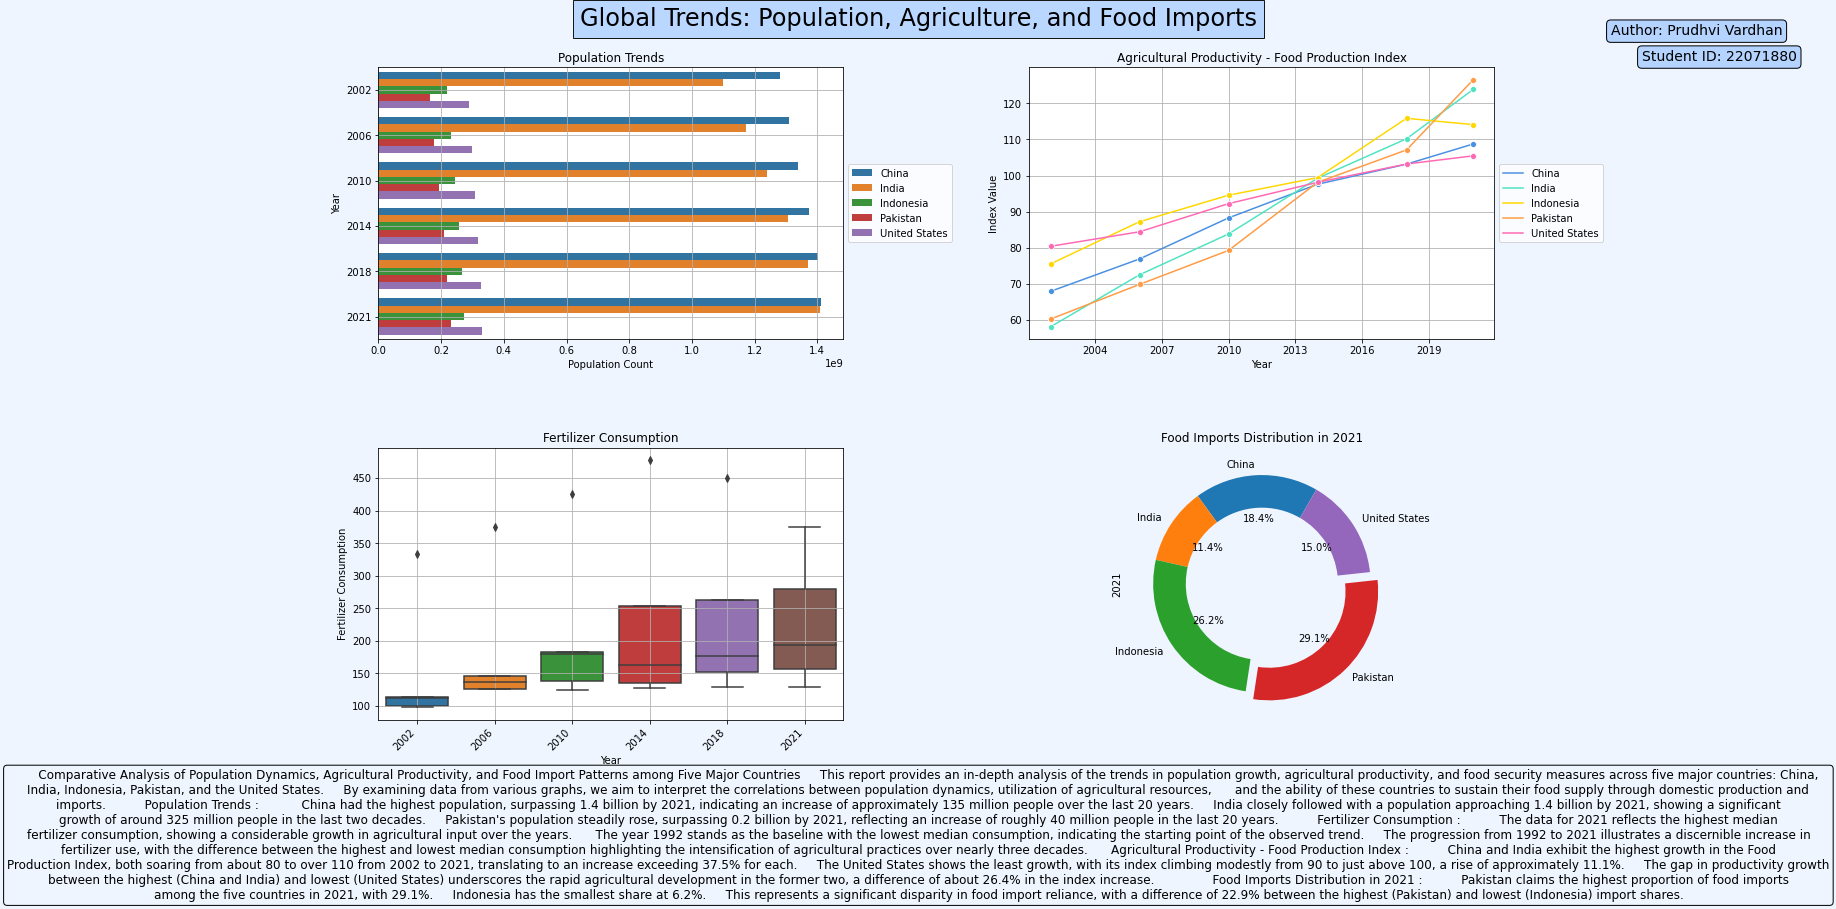

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap

def analyze_and_save_agricultural_trends(file_path, countries, years, dpi=300, output_filename="agricultural_trends.png"):
    """
    Analyze and visualize agricultural trends and save the plot.

    Parameters:
    - file_path (str): The path to the CSV file containing agricultural data.
    - countries (list): List of countries to analyze.
    - years (list): List of years to analyze.
    - dpi (int): Dots per inch for the saved plot (default is 300).
    - output_filename (str): The name of the output plot file (default is "agricultural_trends.png").
    """
    # Read the uploaded file
    data = pd.read_csv(file_path)

    # Clean the data by dropping rows with NaN values
    data_cleaned = data.dropna()

    # Transpose the data
    data_transposed = data_cleaned.transpose()

    # Melt the data for further analysis
    data_melted = data_cleaned.melt(id_vars=['Indicator', 'Country Name'], var_name='Year', value_name='Value')
    data_melted['Year'] = data_melted['Year'].astype(int)  # Convert year to integer

    # Filter data for each plot
    def filter_data_for_plot(df, countries, indicator, years):
        """
        Filter data for plotting.

        Parameters:
        - df (pd.DataFrame): The input DataFrame.
        - countries (list): List of countries to include.
        - indicator (list): List of indicators to include.
        - years (list): List of years to include.

        Returns:
        - pd.DataFrame: Filtered data.
        """
        filtered_data = df[(df['Country Name'].isin(countries)) & (df['Indicator'].isin(indicator)) & (df['Year'].isin(years))]
        return filtered_data

    population_indicator = ["Population, total"]
    food_production_indicator = ["Food production index "]
    food_imports_indicator = 'Food imports (% of merchandise imports)'
    fertilizer_indicator = 'Fertilizer consumption (kilograms per hectare of arable land)'

    population_data = filter_data_for_plot(data_melted, countries, population_indicator, years)
    food_production_data = filter_data_for_plot(data_melted, countries, food_production_indicator, years)
    food_imports_data = filter_data_for_plot(data_melted, countries, [food_imports_indicator], [2021])
    fertilizer_data = filter_data_for_plot(data_melted, countries, [fertilizer_indicator], years)

    # Define a vibrant color palette
    palette = ['#4A90E2', '#50E3C2', '#FFD700', '#FF9B44', '#FF69B4']

    # Ensure the number of colors matches the number of countries, if not, use a Seaborn palette
    if len(palette) < len(countries):
        palette = 'colorblind'  # Seaborn palette

    # Function to plot each subplot
    def plot_population_trends_subplot(ax, df):
        """
        Plot population trends as a bar chart.

        Parameters:
        - ax (matplotlib.axes._subplots.AxesSubplot): The subplot to plot on.
        - df (pd.DataFrame): Data for plotting.
        """
        sns.barplot(x='Value', y='Year', hue='Country Name', data=df, ax=ax, orient='h')
        ax.set_title('Population Trends')
        ax.set_xlabel('Population Count')
        ax.set_ylabel('Year')
        ax.grid(True)
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    def plot_food_production_index_subplot(ax, df):
        """
        Plot food production index trends as a line chart.

        Parameters:
        - ax (matplotlib.axes._subplots.AxesSubplot): The subplot to plot on.
        - df (pd.DataFrame): Data for plotting.
        """
        sns.lineplot(x='Year', y='Value', hue='Country Name', data=df, ax=ax, linestyle='solid', marker='o', palette=palette)
        ax.set_title('Agricultural Productivity - Food Production Index')
        ax.set_ylabel('Index Value')
        ax.set_xlabel('Year')
        ax.grid(True)
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

    def visualize_indicator_distribution_subplot(ax, df):
        """
        Visualize food imports distribution as a pie chart.

        Parameters:
        - ax (matplotlib.axes._subplots.AxesSubplot): The subplot to plot on.
        - df (pd.DataFrame): Data for plotting.
        """
        df_pivot = df.pivot(index='Country Name', columns='Year', values='Value')
        explode = [0, 0, 0, 0.1, 0]
        df_pivot.plot(kind='pie', y=2021, autopct='%1.1f%%', startangle=60, ax=ax, legend=False,
                      wedgeprops=dict(width=0.3), explode=explode)
        ax.set_title('Food Imports Distribution in 2021')
        ax.grid(True)

    def plot_boxplot_for_indicator_subplot(ax, df):
        """
        Plot box plot for fertilizer consumption.

        Parameters:
        - ax (matplotlib.axes._subplots.AxesSubplot): The subplot to plot on.
        - df (pd.DataFrame): Data for plotting.
        """
        sns.boxplot(data=df, x='Year', y='Value', ax=ax)
        ax.set_title('Fertilizer Consumption')
        ax.set_ylabel('Fertilizer Consumption')
        ax.set_xlabel('Year')
        ax.grid(True)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
         


    fig, axs = plt.subplots(2, 2, figsize=(20, 12), facecolor='#EEF5FF')
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    plot_population_trends_subplot(axs[0, 0], population_data)
    plot_food_production_index_subplot(axs[0, 1], food_production_data)
    visualize_indicator_distribution_subplot(axs[1, 1], food_imports_data)
    plot_boxplot_for_indicator_subplot(axs[1, 0], fertilizer_data)

    report_text = """
    Comparative Analysis of Population Dynamics, Agricultural Productivity, and Food Import Patterns among Five Major Countries
    This report provides an in-depth analysis of the trends in population growth, agricultural productivity, and food security measures across five major countries: China, India, Indonesia, Pakistan, and the United States.
    By examining data from various graphs, we aim to interpret the correlations between population dynamics, utilization of agricultural resources, 
    and the ability of these countries to sustain their food supply through domestic production and imports.
    
    Population Trends :
     
    China had the highest population, surpassing 1.4 billion by 2021, indicating an increase of approximately 135 million people over the last 20 years.
    India closely followed with a population approaching 1.4 billion by 2021, showing a significant growth of around 325 million people in the last two decades.
    Pakistan's population steadily rose, surpassing 0.2 billion by 2021, reflecting an increase of roughly 40 million people in the last 20 years.
    
    Fertilizer Consumption :
    
    The data for 2021 reflects the highest median fertilizer consumption, showing a considerable growth in agricultural input over the years. 
    The year 1992 stands as the baseline with the lowest median consumption, indicating the starting point of the observed trend.
    The progression from 1992 to 2021 illustrates a discernible increase in fertilizer use, with the difference between the highest and lowest median consumption highlighting the intensification of agricultural practices over nearly three decades.

    Agricultural Productivity - Food Production Index :
    
    China and India exhibit the highest growth in the Food Production Index, both soaring from about 80 to over 110 from 2002 to 2021, translating to an increase exceeding 37.5% for each.
    The United States shows the least growth, with its index climbing modestly from 90 to just above 100, a rise of approximately 11.1%.
    The gap in productivity growth between the highest (China and India) and lowest (United States) underscores the rapid agricultural development in the former two, a difference of about 26.4% in the index increase.
    
    
    Food Imports Distribution in 2021 :
    
    Pakistan claims the highest proportion of food imports among the five countries in 2021, with 29.1%.
    Indonesia has the smallest share at 6.2%.
    This represents a significant disparity in food import reliance, with a difference of 22.9% between the highest (Pakistan) and lowest (Indonesia) import shares.


     """
    bbox_props = dict(boxstyle='round', pad=0.3, facecolor='#EEF5FF', edgecolor='black')
    
    text_y_position = -0.08  
    fig.text(0.5, text_y_position, textwrap.fill(report_text, width=300), 
             horizontalalignment='center', fontsize=12, color='black', wrap=True, bbox=dict(boxstyle='round', facecolor='#EEF5FF', alpha=1.0))


    #fig.text(0.5, -0.2, textwrap.dedent(report_text).strip(), fontsize=14, ha='center', va='center', bbox=bbox_props)

    author_box = dict(boxstyle='round', facecolor='#B4D4FF', alpha=1.0)
    plt.text(1.1, 0.93, "Author: Prudhvi Vardhan", transform=fig.transFigure, ha="right", va="top", fontsize=14, color='black',
             bbox=author_box)
    plt.text(1.11, 0.90, "Student ID: 22071880", transform=fig.transFigure, ha="right", va="top", fontsize=14, color="black",
             bbox=author_box)

    title_box = dict(boxstyle='square', facecolor='#B4D4FF', alpha=0.9, edgecolor='black')

    plt.text(0.5, 0.95, "Global Trends: Population, Agriculture, and Food Imports", transform=fig.transFigure, ha="center", va="top", fontsize=24, color='black',
             bbox=title_box)

    plt.show()
    fig.savefig(output_filename, dpi=dpi, bbox_inches='tight')

analyze_and_save_agricultural_trends("C:/Users/user/Downloads/agriculture_data.csv",
                                     ['China', 'India', 'Pakistan', 'Indonesia', 'United States'],
                                     [2002, 2006, 2010, 2014, 2018, 2021], dpi=300, output_filename="22071880dhv.png")
